In [1]:
using LinearAlgebra
using ProgressMeter
using StatsBase
using Plots
using FisherGillespie

import Random
Random.seed!(1234)

Random.TaskLocalRNG()

In [2]:
function σ(i,j)
    v_i = complex(zeros(3))
    v_i[i] = 1
    v_j = complex(zeros(3))
    v_j[j] = 1    
    return v_i * v_j' 
end;

In [3]:
# Parameters.
θH = 0 # Parameter (must be zero to have a linear GKSL evolution)
θC = 0 # Parameter (must be zero to have a linear GKSL evolution)
γH = 0.3 # Bath coupling strength
γC= 0.1 # Bath coupling strength
# TODO: better define the following two parameters
Δ = 1 # Detuning parameter
Ω = 1 # "Rabi" frequency
dt = 0.001
t_max = 1
NbarH = 8
NbarC = 2

# Initial state
ψ0 = complex(float([1 ; 0 ; 0]))

# Simulation parameters.
t_final = 100.
dt = 0.01
dΔ = 0.01
dγH = 0.
number_trajectories = 100
n_t_initial_fit = Int(floor(50. / dt));

# Hamiltonian.
H = - Δ * σ(2,2) + Ω * (σ(1,2) + σ(2,1))
# Displaced versions.
Hp = - (Δ + dΔ) * σ(2,2) + Ω * (σ(1,2) + σ(2,1))
Hm = - (Δ - dΔ) * σ(2,2) + Ω * (σ(1,2) + σ(2,1))

# Jump operator.
L_Hin = sqrt(γH * NbarH) * σ(3,1)
L_Hout = sqrt(γH * (NbarH + 1)) * σ(1,3)
L_Cout = sqrt(γC * NbarC) * σ(3,2)
L_Cin = sqrt(γC * (NbarC + 1)) * σ(2,3)

Lp_Hin = sqrt((γH + dγH) * NbarH) * σ(3,1)
Lp_Hout = sqrt((γH + dγH) * (NbarH + 1)) * σ(1,3)
Lp_Cout = sqrt(γC * NbarC) * σ(3,2)
Lp_Cin = sqrt(γC * (NbarC + 1)) * σ(2,3)

Lm_Hin = sqrt((γH - dγH) * NbarH) * σ(3,1)
Lm_Hout = sqrt((γH + dγH) * (NbarH + 1)) * σ(1,3)
Lm_Cout = sqrt(γC * NbarC) * σ(3,2)
Lm_Cin = sqrt(γC * (NbarC + 1)) * σ(2,3)

M_l = [[L_Hout], [L_Cout]]
Mp_l = [[Lp_Hout], [Lp_Cout]]
Mm_l = [[Lm_Hout], [Lm_Cout]];
S_l = [L_Hin, L_Cin]
Sp_l = [Lp_Hin, Lp_Cin]
Sm_l = [Lm_Hin, Lm_Cin]

ρ0 =  ψ0 * ψ0';

In [5]:
# Situation: all jumps monitored, distinct
M_l = [[L_Hout], [L_Cout], [L_Hin], [L_Cin]]
Mp_l = [[Lp_Hout], [Lp_Cout], [Lp_Hin], [Lp_Cin]]
Mm_l = [[Lm_Hout], [Lm_Cout], [Lm_Hin], [Lm_Cin]]
S_l = Matrix{ComplexF64}[]
Sp_l = Matrix{ComplexF64}[]
Sm_l = Matrix{ComplexF64}[]

trajectories_results, V, Vdot, t_range = FisherGillespie.gillespie_fisher_mixed(H, Hp, Hm, M_l, Mp_l, Mm_l, S_l, Sp_l, Sm_l, ρ0, t_final, dt, dΔ, number_trajectories, false)

average_fisher_all = zeros(length(t_range))
println()

list_trajectories_fisher = []

@showprogress 1 "Filling in the gaps..." for n_trajectory in eachindex(trajectories_results)
    v_fisher = FisherGillespie.fisher_at_time_on_trajectory_mixed(t_range, t_range, V, Vdot, trajectories_results[n_trajectory], ρ0)
    push!(list_trajectories_fisher, v_fisher)
    average_fisher_all += v_fisher / number_trajectories
end

"Starting Gillespie evolution"

Precomputing no-jumps... 100%|███████████████████████████| Time: 0:00:01
Precomputing derivatives... 100%|████████████████████████| Time: 0:00:00


"Number of created jump maps: 4"

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:12


"All good"

Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:04


In [6]:
# Situation: only in-jumps monitored, distinct
M_l = [[L_Hin], [L_Cin]]
Mp_l = [[Lp_Hin], [Lp_Cin]]
Mm_l = [[Lm_Hin], [Lm_Cin]];
S_l = [L_Hout, L_Cout]
Sp_l = [Lp_Hout, Lp_Cout]
Sm_l = [Lm_Hout, Lm_Cout]

trajectories_results, V, Vdot, t_range = FisherGillespie.gillespie_fisher_mixed(H, Hp, Hm, M_l, Mp_l, Mm_l, S_l, Sp_l, Sm_l, ρ0, t_final, dt, dΔ, number_trajectories, false)

average_fisher_in_distinct = zeros(length(t_range))
println()

list_trajectories_fisher = []

@showprogress 1 "Filling in the gaps..." for n_trajectory in eachindex(trajectories_results)
    v_fisher = FisherGillespie.fisher_at_time_on_trajectory_mixed(t_range, t_range, V, Vdot, trajectories_results[n_trajectory], ρ0)
    push!(list_trajectories_fisher, v_fisher)
    average_fisher_in_distinct += v_fisher / number_trajectories
end

"Starting Gillespie evolution"

Precomputing no-jumps... 100%|███████████████████████████| Time: 0:00:01
Precomputing derivatives... 100%|████████████████████████| Time: 0:00:02


"Number of created jump maps: 2"

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:07


"All good"

Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:02


In [7]:
# Situation: only out-jumps monitored, distinct
M_l = [[L_Hout, L_Cout]]
Mp_l = [[Lp_Hout, Lp_Cout]]
Mm_l = [[Lm_Hout, Lm_Cout]];
S_l = [L_Hin, L_Cin]
Sp_l = [Lp_Hin, Lp_Cin]
Sm_l = [Lm_Hin, Lm_Cin]

trajectories_results, V, Vdot, t_range = FisherGillespie.gillespie_fisher_mixed(H, Hp, Hm, M_l, Mp_l, Mm_l, S_l, Sp_l, Sm_l, ρ0, t_final, dt, dΔ, number_trajectories, false)

average_fisher_out_distinct = zeros(length(t_range))
println()

list_trajectories_fisher = []

@showprogress 1 "Filling in the gaps..." for n_trajectory in eachindex(trajectories_results)
    v_fisher = FisherGillespie.fisher_at_time_on_trajectory_mixed(t_range, t_range, V, Vdot, trajectories_results[n_trajectory], ρ0)
    push!(list_trajectories_fisher, v_fisher)
    average_fisher_out_distinct += v_fisher / number_trajectories
end

"Starting Gillespie evolution"

Precomputing no-jumps... 100%|███████████████████████████| Time: 0:00:02
Precomputing derivatives... 100%|████████████████████████| Time: 0:00:03


"Number of created jump maps: 1"

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:06


"All good"

Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:02


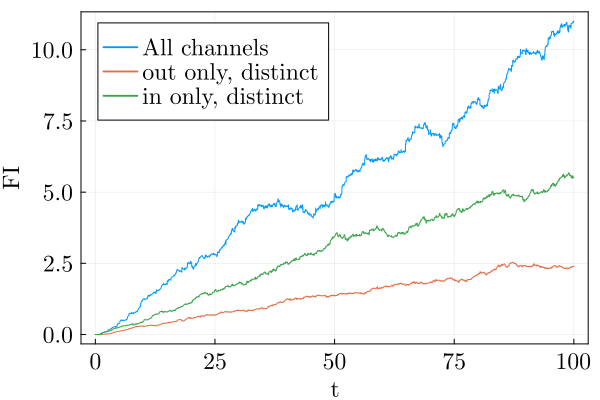

In [9]:
plot(t_range, average_fisher_all, label="All channels", legend=:topleft, xlabel="t", ylabel="FI", fontfamily="Computer Modern", guidefontsize=15, tickfontsize=15, legendfontsize=15, border=:box)
plot!(t_range, average_fisher_out_distinct, label="out only, distinct")
plot!(t_range, average_fisher_in_distinct, label="in only, distinct")